In [14]:
# STUDENT PERFORMANCE ANALYSIS PROJECT
# Built using: Pandas, NumPy, Matplotlib, Seaborn
# Description: Full analytics dashboard for student marks

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# Load Dataset
df = pd.read_csv("student_scores.csv")

In [18]:
# Data Cleaning
df.dropna(inplace=True)  # remove missing values
subjects = ['Math', 'Science', 'English', 'History']

In [19]:
# Calculations
df['Total'] = df['Math'] + df['Science'] + df['English'] + df['History']
df['Average'] = df['Total'] / 4
df['Status'] = ['Pass' if avg >= 50 else 'Fail' for avg in df['Average']]

def give_grade(avg):
    if avg >= 90:
        return 'A+'
    elif avg >= 80:
        return 'A'
    elif avg >= 70:
        return 'B'
    elif avg >= 60:
        return 'C'
    elif avg >= 50:
        return 'D'
    else:
        return 'F'

df['Grade'] = df['Average'].apply(give_grade)
df['Rank'] = df['Average'].rank(ascending=False).astype(int)

In [20]:
# Subject Stats
subject_stats = df[subjects].describe()
print("\nSubject Statistics:\n", subject_stats)


Subject Statistics:
             Math    Science    English   History
count  30.000000  30.000000  30.000000  30.00000
mean   70.666667  71.933333  69.800000  70.60000
std    15.996408  15.418156  14.235458  14.63251
min    35.000000  40.000000  38.000000  39.00000
25%    62.500000  60.000000  60.500000  62.75000
50%    71.000000  73.500000  70.000000  71.50000
75%    84.750000  85.750000  82.000000  82.25000
max    93.000000  95.000000  95.000000  92.00000


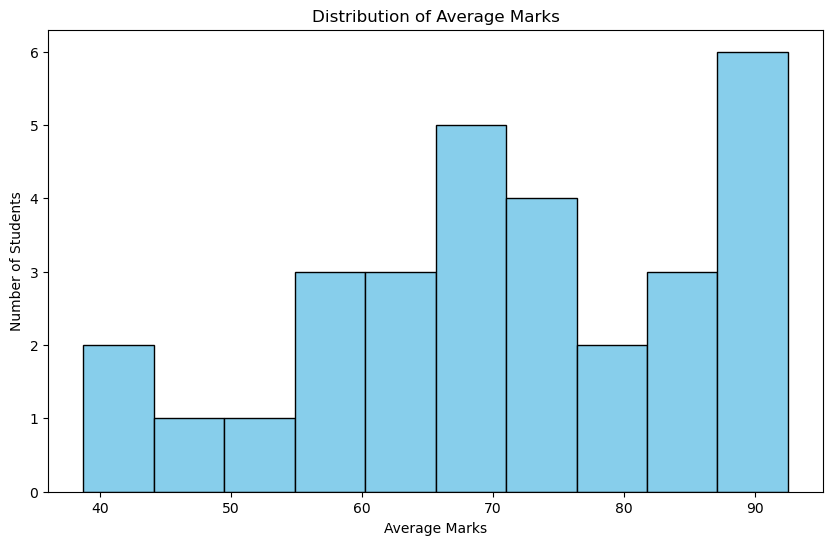

In [21]:
# 1. Average Distribution
plt.hist(df['Average'], bins=10, color='skyblue', edgecolor='black')
plt.title("Distribution of Average Marks")
plt.xlabel("Average Marks")
plt.ylabel("Number of Students")
plt.show()

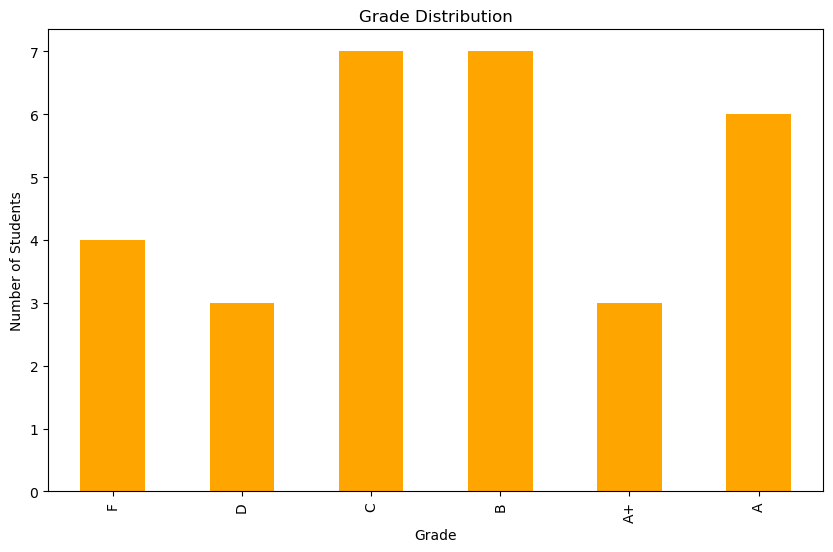

In [22]:
# 2. Grade Distribution
grade_counts = df['Grade'].value_counts().sort_index(ascending=False)
grade_counts.plot(kind='bar', color='orange')
plt.title("Grade Distribution")
plt.xlabel("Grade")
plt.ylabel("Number of Students")
plt.show()

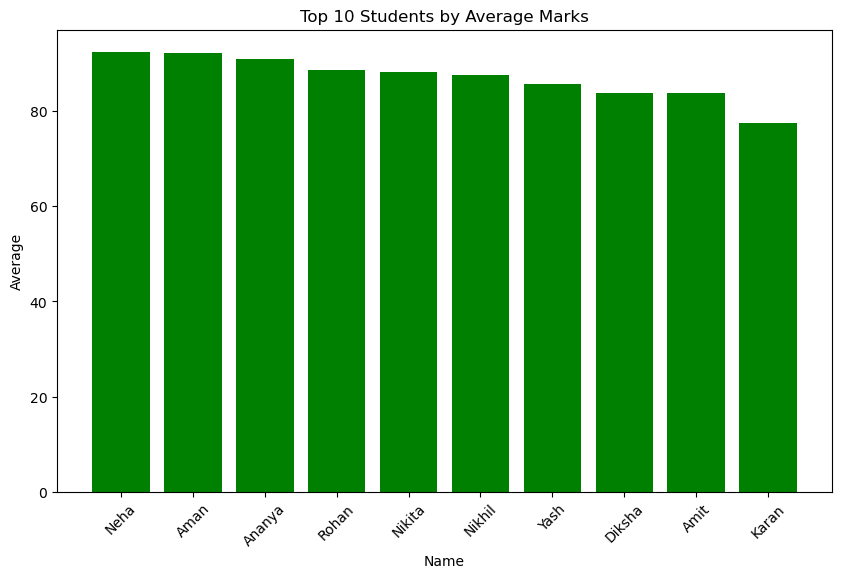

In [23]:
# 3. Top 10 Performers
top10 = df.sort_values(by='Average', ascending=False).head(10)
plt.bar(top10['Name'], top10['Average'], color='green')
plt.title("Top 10 Students by Average Marks")
plt.xlabel("Name")
plt.ylabel("Average")
plt.xticks(rotation=45)
plt.show()

C:\Users\shwet\AppData\Local\Temp\ipykernel_1844\2639159652.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df['Math'], df['Science'], df['English'], df['History']], labels=subjects)


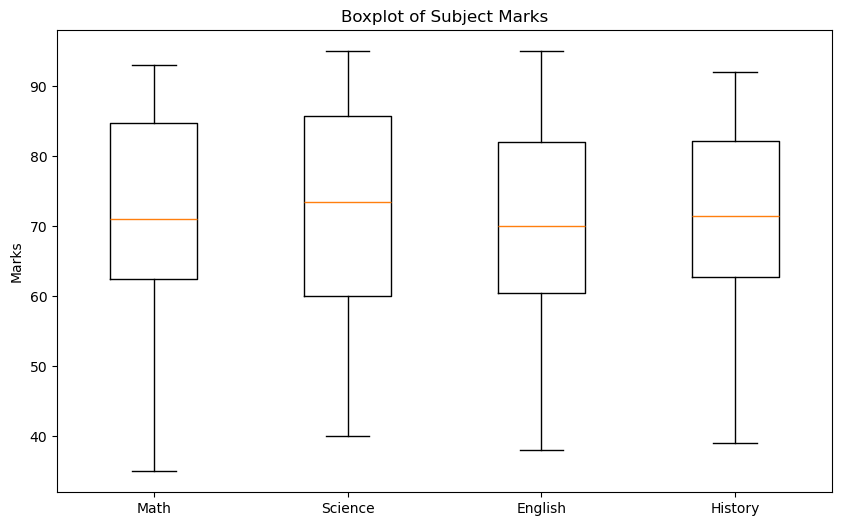

In [24]:
# 4. Boxplot for Subject Marks
plt.boxplot([df['Math'], df['Science'], df['English'], df['History']], labels=subjects)
plt.title("Boxplot of Subject Marks")
plt.ylabel("Marks")
plt.show()

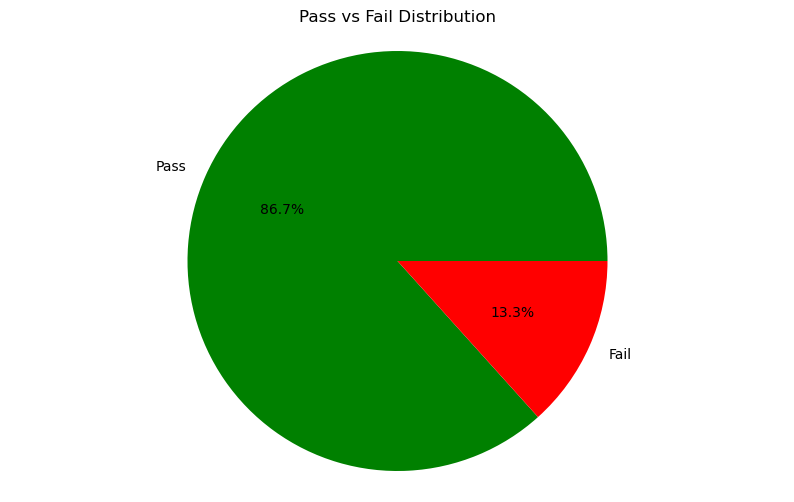

In [25]:
# 5. Pass vs Fail Pie Chart
pass_count = df['Status'].value_counts()
plt.pie(pass_count, labels=pass_count.index, autopct='%1.1f%%', colors=['green', 'red'])
plt.title("Pass vs Fail Distribution")
plt.axis('equal')  # Equal aspect ratio ensures pie is circular
plt.show()

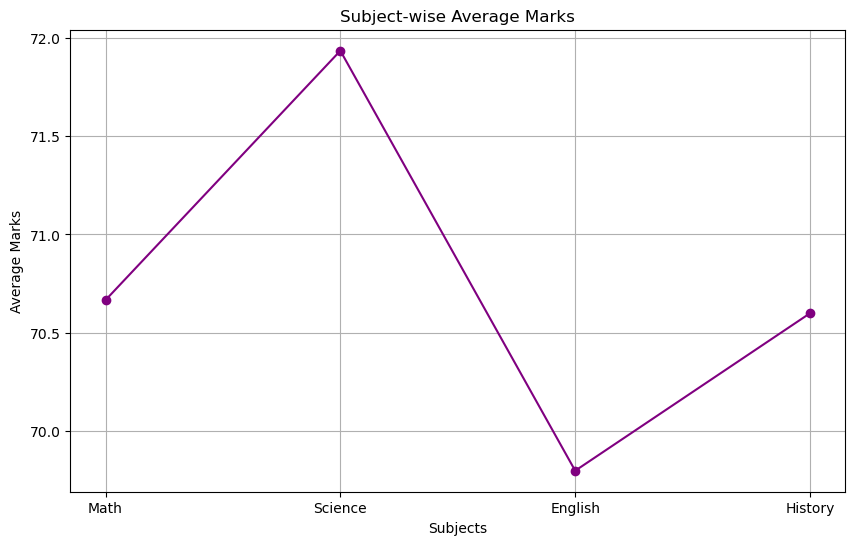

In [26]:
# 6. Subject-wise Average Line Chart
subject_averages = df[subjects].mean()
plt.plot(subjects, subject_averages, marker='o', linestyle='-', color='purple')
plt.title("Subject-wise Average Marks")
plt.xlabel("Subjects")
plt.ylabel("Average Marks")
plt.grid(True)
plt.show()

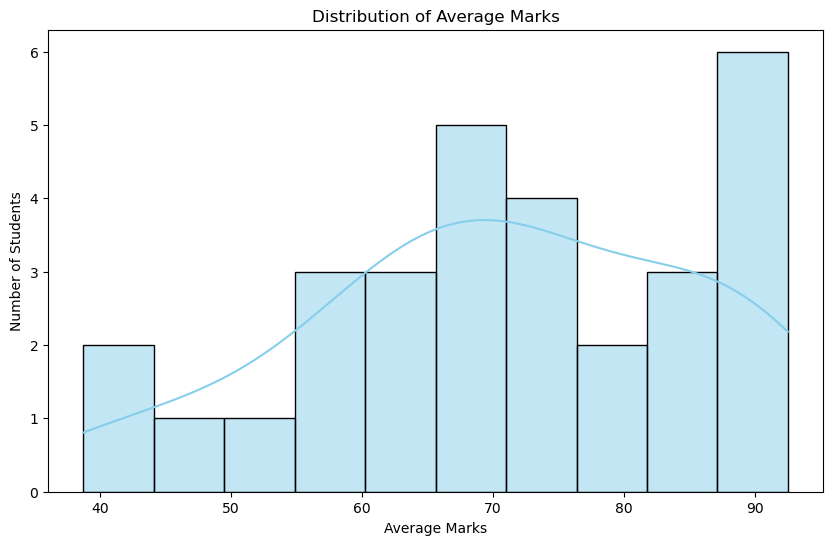

In [27]:
# Average Distribution using seaborn
sns.histplot(df['Average'], bins=10, kde=True, color='skyblue')
plt.title("Distribution of Average Marks")
plt.xlabel("Average Marks")
plt.ylabel("Number of Students")
plt.show()

C:\Users\shwet\AppData\Local\Temp\ipykernel_1844\2251551441.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Grade', data=df, order=sorted(df['Grade'].unique(), reverse=True), palette='Set2')


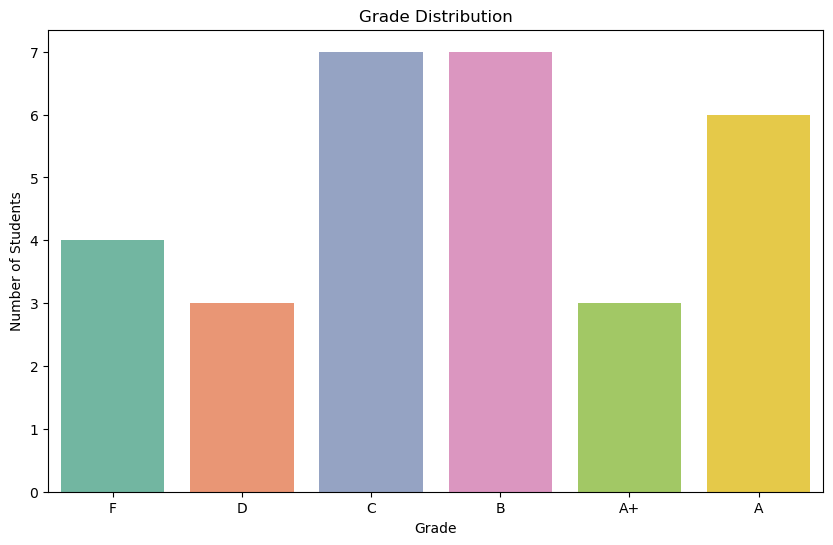

In [28]:
# Grade Distribution using seaborn
sns.countplot(x='Grade', data=df, order=sorted(df['Grade'].unique(), reverse=True), palette='Set2')
plt.title("Grade Distribution")
plt.xlabel("Grade")
plt.ylabel("Number of Students")
plt.show()

In [ ]:
# Heatmap of Correlation (for subject analysis)
correlation = df[['Math', 'Science', 'English', 'History', 'Average']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Subjects and Average")
plt.show()